# Analysis of Pima Indians Diabetes Dataset 


* **1.Introduction**
  * 1.1 Dataset Overview
  * 1.2 Goal of the project
  * 1.3 Modeling
  
* **2.Pre-Processing and data cleaning** 
  * 2.1 Data extraction 
  * 2.2 Importing Libraries 
  * 2.3 Data Cleaning and Imputation 

* **3.Exploratory data analysis**
  * 3.1 Descriptive Statistics
  * 3.2 Visualizations
  * 3.3 Checking correlation between variables  

* **4.Model**
  * 4.1 Introduction of model 
  * 4.2 Fitting Logistic Regression 
  * 4.3 Analyzing Results 
    * Evaluating Model Perfomance
    * Trying to Improve Model with K-fold cross validation technique and Random Forest 
   

* **5.Summary and Conclusion**
  

# 1.Introduction and Context

**Data:** The data we analyzed in thhis project contains information on Pima Indians, particularly females 21 years of age and
older. It contains 9 colums and 768 rows alltogether. There are 8 predictors and 1 binary varible where 0 means no 
diabetes and 1 means presense of diabetes.

* **Pregnancies** - Refers to the number of times woman has gotten pregnant (note: does not equal to number of kids)

* **GlucosePlasma** - this variable refers to glucose concentration in a 2 hours in an oral glucose tolerance test

* **BloodPressureDiastolic** - this explans blood pressure in mm Hg

* **SkinThicknessTriceps** - this variables referes to skin fold thickness and is measured in mm

* **Insulin2** - serum insulin measured in mu U/ml

* **BMI** - this is Body Mass iIndex, calculated by weight (in kg)/(height (in m)^2)

* **DiabetesPedigreeFunction** - The probability score that patient will have diabetes based on his family history

* **Age** - this is age of the participants in years

* **Outcome** - this is a binary variable, recorded as either 0 or 1 where 0 means absense of diabetes and 1 means presen
of diabetes. 

**Goal:** By using eight different variables given in the dataset, we try to indentify person is diabetic or not and what variables are showing impact on target variable.

**Modeling:**  We will evaluate the relation of diabetes with predictor variables and build a model to predict whether a female  has diabetes or not. Our model will help in detection of diabetes which would set the stage for preventative medicine.



# 2.Pre-Processing and Data Cleaning 

## 2.1 Data Extraction

In [1]:
import os
from os.path import expanduser
home = expanduser("~") #finding local user
dirName = home+'\\.kaggle' # assigning .kaggle folder location
if not os.path.exists(dirName):
    os.mkdir(home+'\\.kaggle') #checking if folder doesn't exist then create
my_filename = os.path.join(dirName, "kaggle.json") #creating json file
with open(my_filename, "w") as handle:
    print('{"username":"<insert your username>","key":"<insert your key>"}', file=handle) #inserting API cred to json file
print("Successfully Prepared Kaggle Environment")

Successfully Prepared Kaggle Environment


In [2]:
import kaggle

In [3]:
os.chdir(home)
os.system('kaggle datasets download -d "uciml/pima-indians-diabetes-database"')
print("Zip File Downloaded Successfully")

Zip File Downloaded Successfully


In [4]:
import zipfile
zipfiledir = home+'/pima-indians-diabetes-database.zip'
with zipfile.ZipFile(zipfiledir, 'r') as zip_ref:
    zip_ref.extractall(home)
print("File extracted successfully")

File extracted successfully


In [8]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
def readCsv(csvFile):
    """
    :param csv: Filename of the csv
    :return: data of csv
    """
    data = pd.read_csv(csvFile)
    return data
diabetesData = readCsv('diabetes.csv')
print(diabetesData)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## 2.2 Importing Libraries 

In [6]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import Imputer
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 2.3 Data Cleaning and Imputation

In [9]:
def imputingValues(df, colName):
    import statistics
    median = statistics.median(df[colName])
    df[colName] = df[colName].replace(0, median)

imputingValues(diabetesData, "Glucose")
imputingValues(diabetesData, "BloodPressure")
imputingValues(diabetesData, "SkinThickness")
imputingValues(diabetesData, "Insulin")
imputingValues(diabetesData, "BMI")
imputingValues(diabetesData, "DiabetesPedigreeFunction")
imputingValues(diabetesData, "Age")




# 3.Exploratory data analysis  

## 3.1 Descriptive Statistics 

In [10]:
basicStats = diabetesData.describe()
basicStats = basicStats.rename({"50%": "median"}, axis="index")
print(basicStats)

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  121.656250      72.386719      27.334635   94.652344   
std        3.369578   30.438286      12.096642       9.229014  105.547598   
min        0.000000   44.000000      24.000000       7.000000   14.000000   
25%        1.000000   99.750000      64.000000      23.000000   30.500000   
median     3.000000  117.000000      72.000000      23.000000   31.250000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
count   768.000000                768.000000  768.000000  768.000000  
mean     32.450911                  0.471876   33.240885    0.348958  
std       6.875366                  0.331329   11.760232    0.476951  
min      18.200000    

In [11]:
diabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.2 Visualizations


**1. BAR PLOT** - to visualize the distribution of the outcome variable  

Text(0.5, 1.0, 'Distribution of Diabetes in the Dataset')

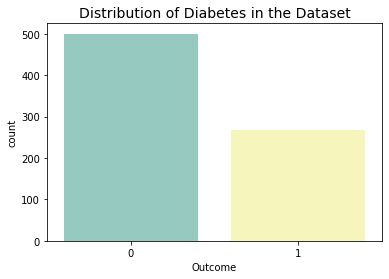

In [12]:
import seaborn as sns

sns.countplot(x="Outcome", data=diabetesData, palette="Set3")

#Used countplot function instead of the barplot function - because it allows the count of obsevrations in each bin
#If barplot function is used - shows one big block

#set the chart title
plt.title('Distribution of Diabetes in the Dataset',fontsize=14,color='black')


Class distribution:
0 : 500
1 : 268

Total number of cases presented are 786
The number of non-diabetics is almost twice the number of diabetic patients

**2. HISTOGRAMS** 

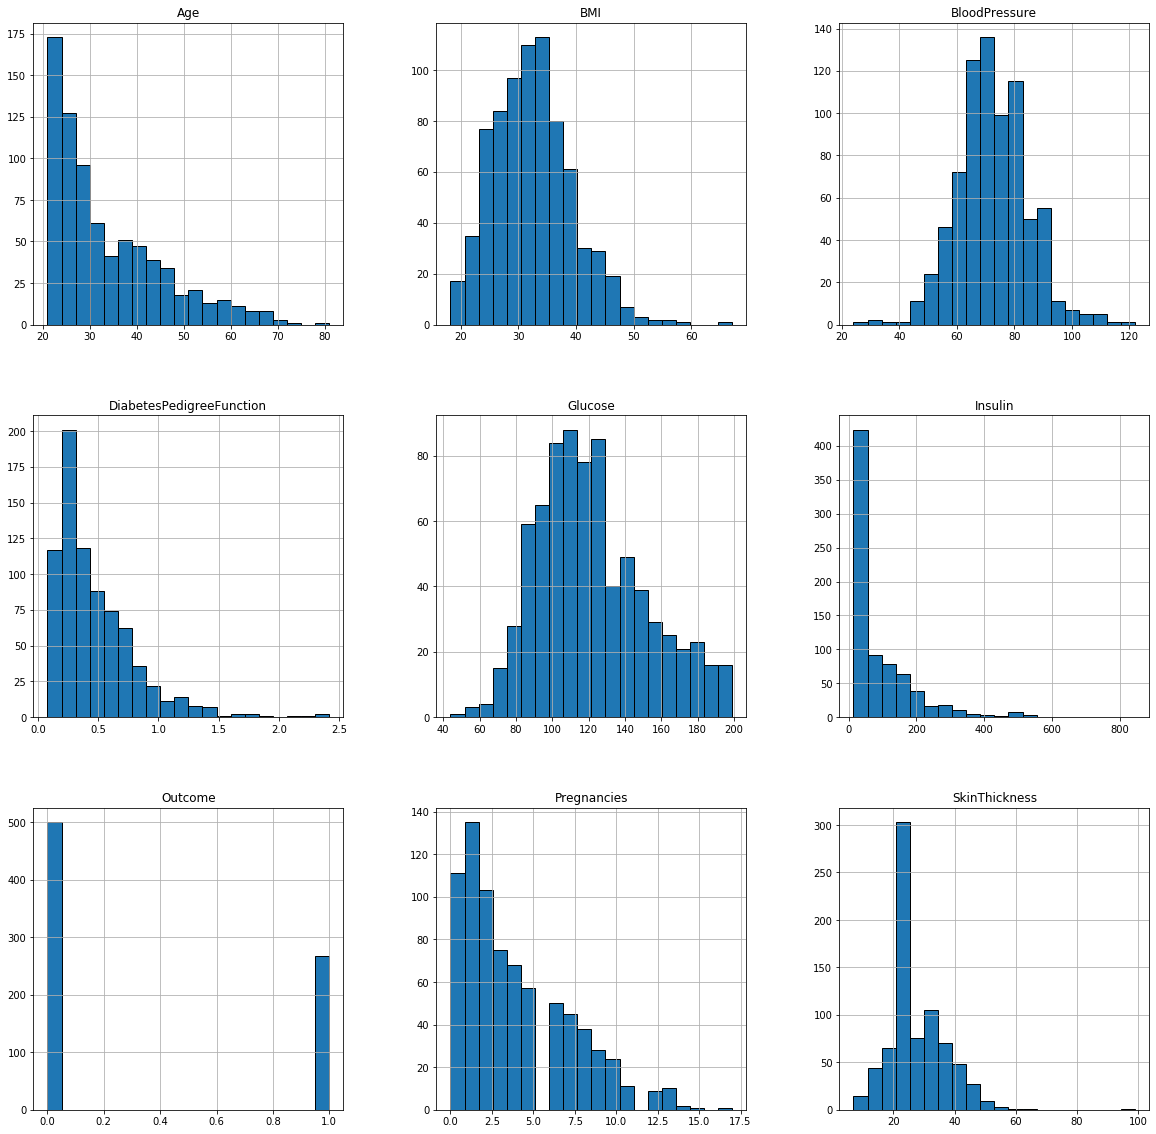

In [13]:
diabetesData.hist(figsize = (20,20), bins=20,edgecolor='black')
plt.show()

**3. DENSITY PLOT**

Density plot was plotted to understand the distribution of outcome variable amongst other variables 

Text(0, 0.5, 'Density')

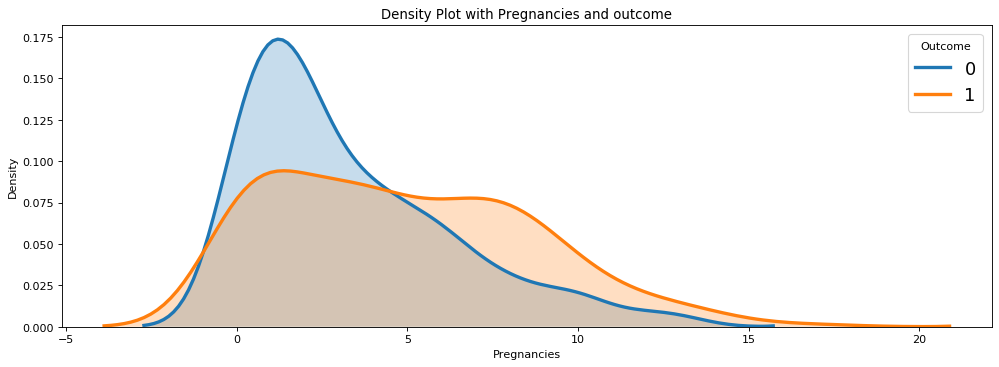

In [14]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w')


sns.distplot(diabetesData['Pregnancies'][diabetesData['Outcome'] == 0], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 0)
sns.distplot(diabetesData['Pregnancies'][diabetesData['Outcome'] == 1], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 1)


plt.legend(prop={'size': 16}, title = 'Outcome')

plt.title('Density Plot with Pregnancies and outcome')

plt.xlabel('Pregnancies')

plt.ylabel('Density')

**Observation**

It appears that people without diabetes are in greater concentration aronnd 0 to 5 pregnancies - this is observed though greater  density in the blue curve compared to the orange one. It also observed that after 5 pregnancies there is greater density in the orange curve which means that women with diabetes has had greater number of pregnancies over all observed by greater density in the orange curve. 
Diabetes is known to cause infertility in women. However, number of pregnancies does not equal to the number of kids. Hence, this could mean that women with diabetes did get pregnant but had a miscarriage leading to greater number of pregnancies overall. In other words, diabetes could make it harder to sustain a child in the womb. 

Text(0, 0.5, 'Density')

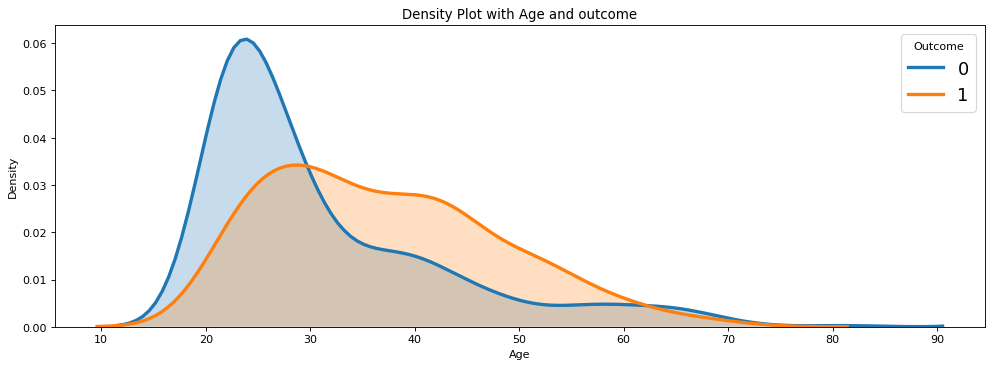

In [15]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')


sns.distplot(diabetesData['Age'][diabetesData['Outcome'] == 0], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 0)
sns.distplot(diabetesData['Age'][diabetesData['Outcome'] == 1], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 1)


plt.legend(prop={'size': 16}, title = 'Outcome')

plt.title('Density Plot with Age and outcome')

plt.xlabel('Age')

plt.ylabel('Density')

**Observation**

Diabetes is observed in greater amount in the elder females compared to yonger ones. In other words, there is greater number of women that are older and have diabetes.  

Text(0, 0.5, 'Density')

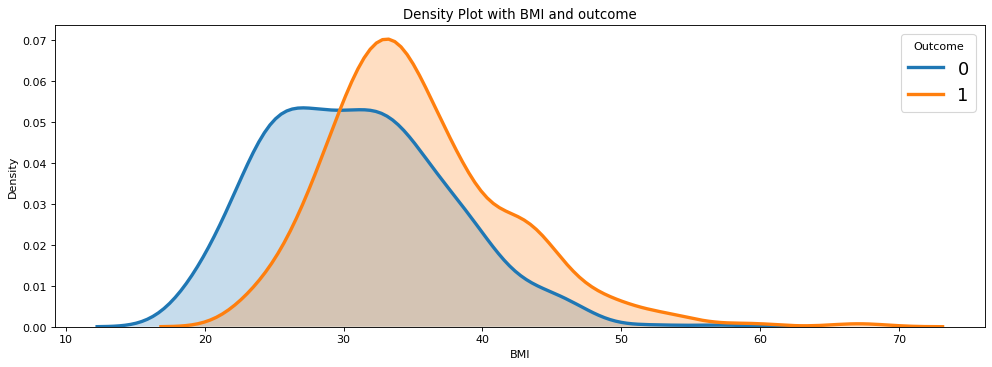

In [16]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')


sns.distplot(diabetesData['BMI'][diabetesData['Outcome'] == 0], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 0)
sns.distplot(diabetesData['BMI'][diabetesData['Outcome'] == 1], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = 1)


plt.legend(prop={'size': 16}, title = 'Outcome')

plt.title('Density Plot with BMI and outcome')

plt.xlabel('BMI')

plt.ylabel('Density')

**Observation**

For  adults, an ideal BMI is 18.5-24.9.The above graph shows that females with diabetes tend to have higher than normal BMI compared to those that do not. 

In [17]:
diabetesData['age_group'] = pd.cut(x=diabetesData['Age'], bins=[20,34, 49, 65, 81],labels=['20-34','35-49', '50-65','66-81'])

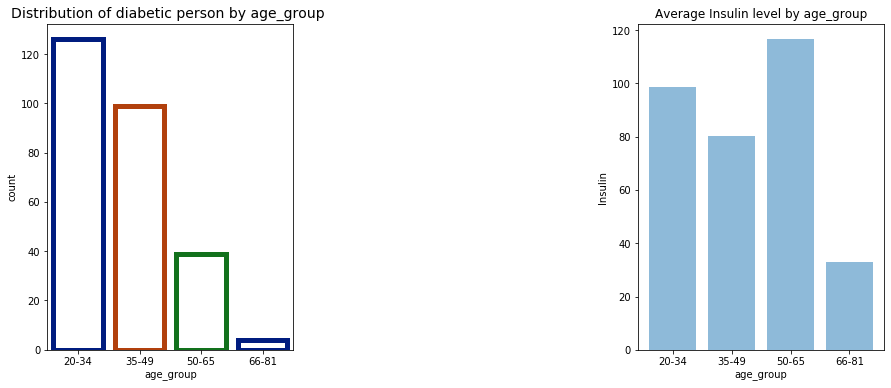

In [18]:
positive = diabetesData[diabetesData.Outcome == 1]
negative = diabetesData[diabetesData.Outcome == 0]


plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(x="age_group", data=positive,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

plt.title('Distribution of diabetic person by age_group ',fontsize=14,color='black')
plt.subplot(1,3,3)
meanbyage_group = diabetesData.groupby('age_group').mean()

plt.bar(meanbyage_group.index,meanbyage_group['Insulin'] , align='center', alpha=0.5)
plt.ylabel('Insulin')
plt.xlabel('age_group')
plt.title('Average Insulin level by age_group')

plt.show()


**Observation**

Type 2 diabetes is a chronic condition that makes an impact on how the body metabolizes glucose. With type 2 diabetes, our body opposes the impacts of insulin — a hormone that controls the development of sugar in the body.  

The dataset contains greater number of yonge adults. As we can see in the correlation plot that although older adults have high insulin levels within the normal range, they still have diabetes which further confirms that they have diabetes type 2. 

Text(0.5, 1.0, 'Comparison of DiabetesPedigreeFunction by age_group')

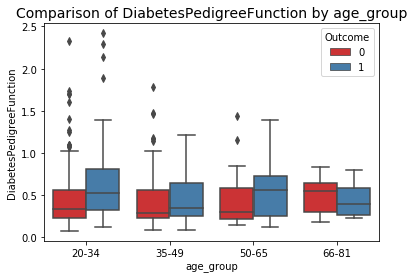

In [19]:
sns.boxplot(x="age_group", y="DiabetesPedigreeFunction", hue="Outcome", data=diabetesData, palette="Set1")
plt.title('Comparison of DiabetesPedigreeFunction by age_group',fontsize=14,color='black')


**Observation**

The diabetes predigree function helps under and track diabetes from the family. If the family has a history of  diabetes then there is high probability that it will be transfered to the younger generation. From the plot we can see that, if the dibetes pedigree count is higher it increase the probability of person being diabetic. 

Text(0.5, 1.0, 'Comparison of Glucose level by age_group')

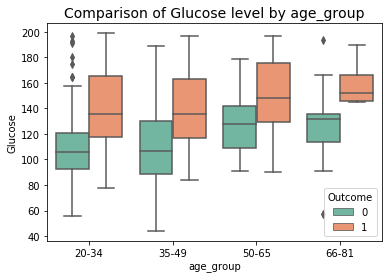

In [20]:
sns.boxplot(x="age_group", y="Glucose", hue="Outcome", data=diabetesData, palette="Set2")
plt.title('Comparison of Glucose level by age_group',fontsize=14,color='black')

**Observation**

From the above plot, we have further evidence that if higher glcuose levels arae releated to presence of diabetes.

## 3.3 Checking correlation between variables

In [21]:
corr = diabetesData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.128213,0.208615,0.0325683,-0.0556974,0.0215462,-0.0335227,0.544341,0.221898
Glucose,0.128213,1,0.218937,0.172143,0.357573,0.2314,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1,0.147809,-0.0287212,0.281132,-0.00237834,0.324915,0.165723
SkinThickness,0.0325683,0.172143,0.147809,1,0.238188,0.546951,0.142977,0.0545138,0.189065
Insulin,-0.0556974,0.357573,-0.0287212,0.238188,1,0.189022,0.178029,-0.0154127,0.148457
BMI,0.0215462,0.2314,0.281132,0.546951,0.189022,1,0.153506,0.0257445,0.312249
DiabetesPedigreeFunction,-0.0335227,0.137327,-0.00237834,0.142977,0.178029,0.153506,1,0.0335613,0.173844
Age,0.544341,0.266909,0.324915,0.0545138,-0.0154127,0.0257445,0.0335613,1,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1


**Observation**

From the above plot, we can understand that glucose has the highest coorelation with presence of diabetes.

# 4.Modeling 

## 4.1 Introdcution

We are building a baseline logistic regression model to predict whether a person has diabetes or not as the dataset consists of supervised learning problems and dependent variable is binary. There are many predictor variables available in the dataset. In the given dataset proportion of diabetic person to a non-diabetic person is 35:65. 


## 4.2 Fitting logistic regression

In [22]:
#Spliting the data
#I will use 70% of data for training and 30% for testing.

Imp_cols = ['Pregnancies', 'BloodPressure','Insulin',
                  'BMI','DiabetesPedigreeFunction','Glucose','SkinThickness','Age']
predicted_class = ['Outcome']

X = diabetesData[Imp_cols].values      
Y = diabetesData[predicted_class]. values   
split_testData = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=52)

#split of data
print("{0:0.4f}% data is in training Data set".format((len(x_train)/len(diabetesData.index)) * 100))
print("{0:0.2f}% data is in test Data set".format((len(x_test)/len(diabetesData.index)) * 100))

69.9219% data is in training Data set
30.08% data is in test Data set


### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [24]:
diabetesData_LogisticRegression= LogisticRegression(C=0.7, random_state=52)
diabetesData_LogisticRegression.fit(x_train, y_train.ravel())
LogisticRegression_test= diabetesData_LogisticRegression.predict(x_test)

print("Model Accuracy is: {0:.4f}".format(metrics.accuracy_score(y_test, LogisticRegression_test)))
print("")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, LogisticRegression_test, labels=[1, 0]))
print("")
print("Classification Report:")
print(metrics.classification_report(y_test, LogisticRegression_test, labels=[1, 0]))

C:\Users\lakda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy is: 0.7835

Confusion Matrix:
[[ 45  31]
 [ 19 136]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.59      0.64        76
           0       0.81      0.88      0.84       155

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231



**Accuracy:** The accuracy of the model is, approx. 79% which means that the model is sucessful 79% of the time in predicting if a person is diabetic or not.

**Precision:** Our precision ratio was 70% which is a good sign. It means that 70% of the time the model accurately predicted outcome. It means the model correctly identified a diabetic person when he is actually diabetic according to our training dataset. 

**Recall:** Recall ratio was here 59% it means the model accuartely predicted the model predicted a diabetic person diabetic 59% of the time. 

As we can see random forest and logistic regression algorithms are not helping to improve the performance esspecially for "Recall" and "Precision". Lets try cross validation algorithm and see if it helps. Python scikit-learn library provides cross validation version for all algorithms.

# 4.3 Logistic Regression with Cross Validation

In [25]:
diabetesData_CrossValidation= LogisticRegressionCV(n_jobs=-1, random_state=52, Cs=3, cv=10, refit=True, class_weight="balanced")
diabetesData_CrossValidation.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=52, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [26]:
#Prediction of test data.
diabetesData_CrossValidation_predict = diabetesData_CrossValidation.predict(x_test)
print("Model Accuracy is: {0:.4f}".format(metrics.accuracy_score(y_test, diabetesData_CrossValidation_predict)))
print("")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, diabetesData_CrossValidation_predict, labels=[1, 0]))
print("")
print("Classification Report:")
print(metrics.classification_report(y_test, diabetesData_CrossValidation_predict, labels=[1, 0]))

Model Accuracy is: 0.7532

Confusion Matrix:
[[ 58  18]
 [ 39 116]]

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.76      0.67        76
           0       0.87      0.75      0.80       155

    accuracy                           0.75       231
   macro avg       0.73      0.76      0.74       231
weighted avg       0.78      0.75      0.76       231



We have tried to imporove our previous model with K-Fold cross validation. Model generally throws two types of errors, bias error and variance error. Bias error is related to the training dataset and occurs when data is too complex. Second one is variance error, it means our model is working fine with the test dataset but it is not perfoming well to training dataset also known as underfitting. 

However, when we applied this model the accuracy is reduced by 3%, though we can conclude that both models are giving same level of accuracy.

# 4.3 Random Forest 

Random forest model is made of many decision trees with a series of yes and no type of logical questions.Here, we have utilized Pregnancy, Insulin, BMI, DiabetesPedigreeFunction, Glucose, SkinThickness, Age, blood pressure to make the tree structure.  To start with random forest, we have started to built series of arbitrary point that are the building blocks for random forest decision. The purpose of creating a series of random blocks is to minimize variances between a set of choices available. Random forest uses the concepts of a random sampling of observations, random sampling of features, and averaging predictions.


In [27]:
diabetesData_RandomForest= RandomForestClassifier(random_state=52)
diabetesData_RandomForest.fit(x_train, y_train.ravel())

C:\Users\lakda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [29]:
#Testing data prediction.
RandomForest_test= diabetesData_RandomForest.predict(x_test)
print("Model Accuracy is: {0:.4f}".format(metrics.accuracy_score(y_test, RandomForest_test)))

Model Accuracy is: 0.7446


In [30]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,RandomForest_test , labels=[1, 0]))
print("")
print("Classification Report:")
print(metrics.classification_report(y_test, RandomForest_test, labels=[1, 0]))

Confusion Matrix:
[[ 39  37]
 [ 22 133]]

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.51      0.57        76
           0       0.78      0.86      0.82       155

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.74      0.74      0.74       231



As we can see we have high accuracy in training data but it dropped drastically from 98% to 70% in testing data. That means our model has overfitted training data and is not able to make predictions on the data it has not seen before very well. 

# 5.Summary and Conclusion 

**Analysis:** 

* We have implemented three models to predict the outcome. However, more or less accuracy level of all three model was the same approximetly 75%. 
* We performed explonatory data analysis to different variables and found that three variables glucose, insulin and BMI have most influence on the prediction. 
* We can conclude from above three model results, logistic regression is the best fit for the dataset. To improve this model we can do feature engineering, i.e. multivariate data analysis to more precise relation between the relation between variables.  